The mod:`sklearn.metrics` module implements several loss, score, and utility functions to measure regression performance. 

Some of those have been enhanced to handle the multioutput case: 

:func:`mean_squared_error`, 

:func:`mean_absolute_error`, 

:func:`explained_variance_score` and 

:func:`r2_score`

 Most common metrics for evaluating predictions on regression machine learning problems:

Mean Absolute Error.

Mean Squared Error.

R^2.

### Mean Absolute Error (MAE)
The Mean Absolute Error (or MAE) is the average of the absolute differences between predictions and actual values. It gives an idea of how wrong the predictions were.

The measure gives an idea of the magnitude of the error, but no idea of the direction (e.g. over or under predicting).

You can learn more about Mean Absolute error on Wikipedia.

### Mean Squared Error (MSE)

The Mean Squared Error (or MSE) is much like the mean absolute error in that it provides a gross idea of the magnitude of error.

Taking the square root of the mean squared error converts the units back to the original units of the output variable and can be meaningful for description and presentation. This is called the Root Mean Squared Error (or RMSE).

You can learn more about Mean Squared Error on Wikipedia.

### R squared

The R^2 (or R Squared) metric provides an indication of the goodness of fit of a set of predictions to the actual values. In statistical literature, this measure is called the coefficient of determination.

This is a value between 0 and 1 for no-fit and perfect fit respectively.

### Challenge for you

Can you write code for all 3 metrics above and calculate Regression metrics for Boston housing data?

#### Part 1: Calculate regression metrics for example data

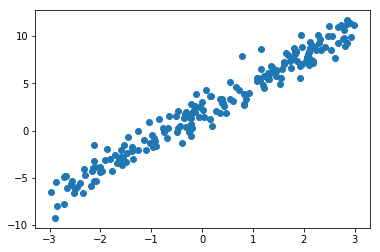

In [24]:
# first let us generate and plot some data to test the metric functions
import numpy as np
import matplotlib.pyplot as plt

x = np.random.uniform(-3,3,200)     # 200 x-values spread uniformly between -3 and 3
y = 2 + 3*x + np.random.randn(200)  # corresponding y-values following this linear function + Gaussian random noise

plt.scatter(x,y);  # scatter plot

In [25]:
# now calculate a linear model using OLS
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr = lr.fit(x.reshape(200,1),y)   # reshape x, as it must be 2-dimensional
lr.intercept_, lr.coef_

(2.025822139282561, array([2.98147304]))

In [33]:
# model parameter are close to the actual ones, now we make predictions
y_pred = lr.predict(x.reshape(200,1))
y_pred[:5]

array([ 2.02930962, -4.31146179,  8.35745688, -3.93325081,  8.878978  ])

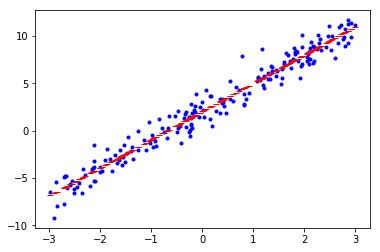

In [34]:
# plot actual points and predicted points (the latter as a line)

plt.plot(x,y,'b.');       # actual
plt.plot(x,y_pred,'r_');  # predicted

In [63]:
# now calculate the different regression metrics, once by myself and once with sklearn

# 1a) mean_squared_error - sklearn
from sklearn.metrics import mean_squared_error
MSE_1 = mean_squared_error(y, y_pred)

# 1b) mean_squared_error - myself
MSE_2 = np.mean(np.square(y - y_pred))

print(MSE_1, MSE_2)
print(MSE_1 == MSE_2)

1.0265700560763933 1.0265700560763933
True


In [64]:
# 1a) mean_absolute_error - sklearn
from sklearn.metrics import mean_absolute_error
MAE_1 = mean_absolute_error(y, y_pred)

# 1b) mean_squared_error - myself
MAE_2 = np.mean(np.abs(y - y_pred))

print(MAE_1, MAE_2)
print(MAE_1 == MAE_2)

0.7969702121200573 0.7969702121200573
True


In [65]:
# 1a) r2 - sklearn
from sklearn.metrics import r2_score
R2_1 = r2_score(y, y_pred)

# 1b) mean_squared_error - myself
SQE = np.sum(np.square(y_pred - np.mean(y)))   # sum of squares - explained
SQT = np.sum(np.square(y - np.mean(y)))        # sum of squares - total
SQR = np.sum(np.square(y - y_pred))            # sum of squares - residuals
R2_2a = SQE / SQT
R2_2b = 1 - (SQR / SQT)

#numerator = (weight * (y_true - y_pred) ** 2).sum(axis=0, dtype=np.float64)
# denominator = (weight * (y_true - np.average(
        # y_true, axis=0, weights=sample_weight)) ** 2).sum(axis=0, dtype=np.float64)

print(R2_1, R2_2a, R2_2b)
print(R2_1 == R2_2b)

0.961632478177847 0.9616324781778465 0.961632478177847
True


#### Part 2: Calculate regression metrics for Boston housing data

In [67]:
import pandas as pd 
df = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/BostonHousing.csv')
df.head(3)

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7


In [70]:
# train/test splitting
from sklearn.model_selection import train_test_split

X = pd.DataFrame(np.c_[df['lstat'], df['rm']], columns = ['lstat','rm'])
y = df['medv']

X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size = 0.2, random_state=5)
print(X_train.shape); print(X_test.shape)
print(Y_train.shape); print(Y_test.shape)

(404, 2)
(102, 2)
(404,)
(102,)


In [77]:
# create function to fit linear or polynomial regression and return RMSE/R2 (from Eli)
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

def create_polynomial_regression_model(degree):
    "Creates a polynomial regression model for the given degree"
  
    poly_features = PolynomialFeatures(degree=degree)
  
    # transforms the existing features to higher degree features
    X_train_poly = poly_features.fit_transform(X_train)
  
    # fit the transformed features to Linear Regression
    poly_model = LinearRegression()
    poly_model.fit(X_train_poly, Y_train)
  
    # predicting on training data-set
    y_train_predict = poly_model.predict(X_train_poly)
  
    # predicting on test data-set
    y_test_predict = poly_model.predict(poly_features.fit_transform(X_test))
  
    # evaluating the model on training dataset
    mae_train = mean_absolute_error(Y_train, y_train_predict)
    mse_train = mean_squared_error(Y_train, y_train_predict)
    rmse_train = np.sqrt(mean_squared_error(Y_train, y_train_predict))
    r2_train = r2_score(Y_train, y_train_predict)
  
    # evaluating the model on test dataset
    mae_test = mean_absolute_error(Y_test, y_test_predict)
    mse_test = mean_squared_error(Y_test, y_test_predict)
    rmse_test = np.sqrt(mean_squared_error(Y_test, y_test_predict))
    r2_test = r2_score(Y_test, y_test_predict)
  
    print("The model performance for the training set")
    print("-------------------------------------------")
    print("MAE of training set is {:.3f}".format(mae_train))    
    print("MSE of training set is {:.3f}".format(mse_train))
    print("RMSE of training set is {:.3f}".format(rmse_train))
    print("R2 score of training set is {:.3f}".format(r2_train))
    print("\n")
    print("The model performance for the test set")
    print("------------------------------------------")
    print("MAE of test set is {:.3f}".format(mae_test))    
    print("MSE of test set is {:.3f}".format(mse_test))
    print("RMSE of test set is {:.3f}".format(rmse_test))
    print("R2 score of test set is {:.3f}".format(r2_test))

In [78]:
create_polynomial_regression_model(1)

The model performance for the training set
-------------------------------------------
MAE of training set is 4.031
MSE of training set is 31.777
RMSE of training set is 5.637
R2 score of training set is 0.630


The model performance for the test set
------------------------------------------
MAE of test set is 3.791
MSE of test set is 26.393
RMSE of test set is 5.137
R2 score of test set is 0.663
